In [46]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import time
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer



In [47]:
df = pd.read_csv('../0.Datasets/processed/processed_car_data.csv').iloc[:100, :]
# df = pd.read_csv('../0.Datasets/processed/sliced_car_data.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,2014-12-16 12:30:00
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,2014-12-16 12:30:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,2015-01-15 04:30:00
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,2015-01-29 04:30:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,2014-12-18 12:30:00


In [48]:
x = df[['condition', 'odometer','mmr']]
x.head()

,condition,odometer,mmr
0,5.0,16639.0,20500.0
1,5.0,9393.0,20800.0
2,45.0,1331.0,31900.0
3,41.0,14282.0,27500.0
4,43.0,2641.0,66000.0


In [49]:
y = df['sellingprice']
y.head()

0    21500.0
1    21500.0
2    30000.0
3    27750.0
4    67000.0
Name: sellingprice, dtype: float64

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state= 0)

In [51]:
numeric_features = ['condition', 'odometer','mmr',]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [52]:
prepocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),

])

In [53]:
knn_pipeline = Pipeline(steps=[
    ('prepocessor', prepocessor), 
    ('classifier', KNeighborsRegressor(metric='minkowski', p=1, n_neighbors= 5))
])

In [54]:
knn_pipeline.fit(x_train, y_train)

Pipeline(steps=[('prepocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['condition', 'odometer',
                                                   'mmr'])])),
                ('classifier', KNeighborsRegressor(p=1))])

In [55]:
y_predict = knn_pipeline.predict(x_test)
y_predict

array([30370., 24520., 27840., 24850., 51840., 40600., 12140., 18640.,
       42180., 65860., 10740., 11560., 22470., 20950., 15180., 11100.,
       14460., 65860., 41030., 32500., 27900., 15290., 24020., 26470.,
       31210., 12140., 65490., 24850., 65270., 22650.])

In [56]:
print(np.array(y_test))

[32500. 21500. 30000. 20500. 61500. 41500.  4200. 13600. 40000. 67200.
 11500. 13200. 22250. 21500.  9800. 11500. 14700. 65000. 44500. 32250.
 30000. 11000. 27750. 26500. 51700. 21250. 65000. 21000. 65801. 13000.]


In [57]:
print(mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))
print(r2_score(y_test, y_predict))

30667148.7
3558.7
0.9139457447301876


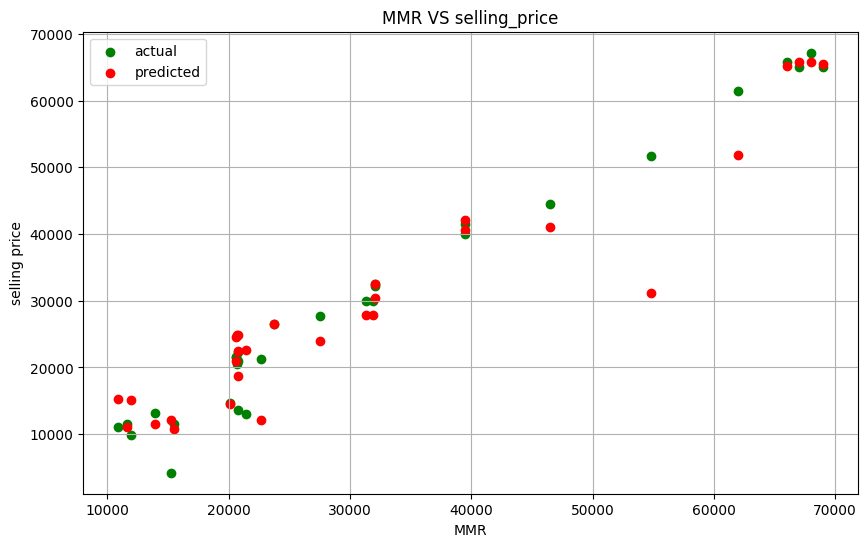

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(x_test['mmr'], y_test, color='green', label='actual')
plt.scatter(x_test['mmr'], y_predict, color='red', label='predicted')

plt.title('MMR VS selling_price')
plt.xlabel('MMR')
plt.ylabel('selling price')
plt.legend()
plt.grid()
# plt.savefig('./Graph_IMG/3.mmr vs selling_price.png')
plt.show()

In [59]:
#Finding best k

In [60]:
error = []

for i in range(1,51):
    knn_regressor = KNeighborsRegressor(n_neighbors= i)
    knn_regressor.fit(x_train, y_train)
    predict_i = knn_regressor.predict(x_test)
    error.append(np.mean(y_test  != predict_i))

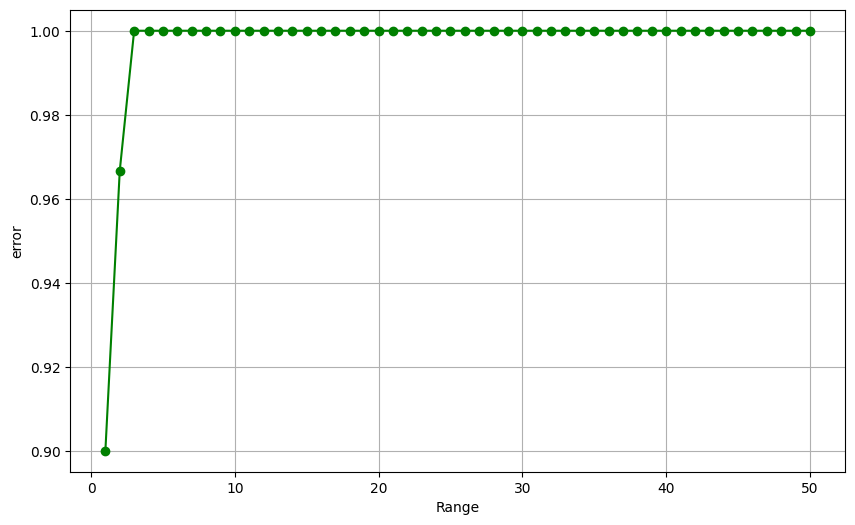

In [61]:
plt.figure(figsize=(10,6))
plt.plot(range(1,51), error, marker='o', color='green')

plt.xlabel('Range')
plt.ylabel('error')

plt.grid()
plt.show()

In [62]:
# k = 2/3

In [63]:
knn_regressor = KNeighborsRegressor(n_neighbors= 3)
knn_regressor.fit(x_train,y_train)
y_predict= knn_regressor.predict(x_test)


print(r2_score(y_predict, y_test))


0.9705424867089061


In [64]:
y_predict

array([32116.66666667, 20833.33333333, 26083.33333333, 21533.33333333,
       63666.66666667, 39833.33333333,  9500.        , 20533.33333333,
       37550.        , 69816.66666667, 11633.33333333, 13533.33333333,
       21533.33333333, 20916.66666667, 12166.66666667,  9766.66666667,
       13500.        , 66066.66666667, 41916.66666667, 30500.        ,
       30833.33333333, 12900.        , 19766.66666667, 20533.33333333,
       50466.66666667, 21533.33333333, 65333.33333333, 21533.33333333,
       64750.        , 20916.66666667])

In [65]:
print(np.array(y_test))

[32500. 21500. 30000. 20500. 61500. 41500.  4200. 13600. 40000. 67200.
 11500. 13200. 22250. 21500.  9800. 11500. 14700. 65000. 44500. 32250.
 30000. 11000. 27750. 26500. 51700. 21250. 65000. 21000. 65801. 13000.]


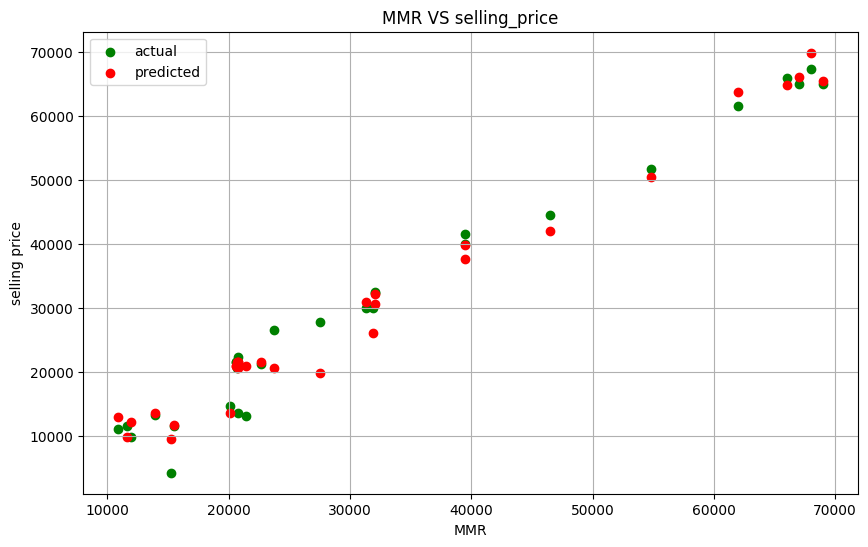

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(x_test['mmr'], y_test, color='green', label='actual')
plt.scatter(x_test['mmr'], y_predict, color='red', label='predicted')

plt.title('MMR VS selling_price')
plt.xlabel('MMR')
plt.ylabel('selling price')
plt.legend()
plt.grid()
plt.savefig('./Graph/2.Best_actual_vs_predicted.png')
plt.show()